In [2]:
%reset -f



from IPython.display import display, Math, Latex,Markdown, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from termcolor import colored
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor

#pd.options.display.float_format = '{:,.2g}'.format
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.f' % x)



In [3]:
display(HTML('<h1><font color="blue">corn silage yield Iran 1395 (2016)</font></h1>'))
display(HTML('<h2><font color="blue">Dataset</font></h2>'))

display(HTML('<h2><font color="blue">Published paper</font></h2>'))
paper_title='Discussion of “under  \
preparation”  \
ro be published'
paper_link="link_not_available"
display(HTML('Paper describing the dataset:' + paper_title +'found in <a href='+paper_link+'>'+paper_link+'</a>'))


In [4]:
df2_province=pd.DataFrame(['Alborz','Alborz','Alborz','Alborz','Alborz','Alborz','Ardabil','Ardabil','Ardabil','Ardabil',
'Ardabil','Ardabil','Esfahan','Esfahan','Esfahan','Esfahan','Esfahan','Esfahan','Esfahan','Esfahan',
'Esfahan','Fars','Fars','Fars','Fars','Fars','Fars','Fars','Fars','Fars',
'Fars','Fars','Fars','Gazvin','Gazvin','Gazvin','Gazvin','Gazvin','Gazvin','Gazvin',
'Gazvin','Gazvin','Gazvin','KhorasanR','KhorasanR','KhorasanR','KhorasanR','KhorasanR','KhorasanR','KhorasanR',
'KhorasanR','KhorasanR','KhorasanR','KhorasanR','KhorasanR','KhorasanR','KhorasanR','KhorasanR','KhorasanR','KhorasanR',
'KhorasanR','Khozestan','Khozestan','Khozestan','Khozestan','Khozestan','Khozestan','Khozestan','Khozestan','Khozestan',
'Khozestan','Khozestan','Khozestan','Khozestan','Khozestan','Khozestan','Khozestan','Khozestan','Khozestan','Khozestan',
'Khozestan','Khozestan','Khozestan','Khozestan','Khozestan','Tehran','Tehran','Tehran','Tehran','Tehran',
'Tehran','Tehran','Tehran','Tehran','Tehran','Tehran','Tehran','Tehran','Tehran','Tehran','Tehran','Tehran',
'Tehran','Tehran'])

df2_county=pd.DataFrame(['Hashtgerd','Hashtgerd','Karaj','Karaj','Karaj','Karaj','Moghan','Moghan','Moghan','Moghan',
'Moghan','Moghan','Shahinshar','Shahinshar','Shahinshar','Shahinshar','Shahinshar','Shahinshar','Shahinshar','Shahinshar',
'Shahinshar','Marvdasht','Marvdasht','Marvdasht','Marvdasht','Marvdasht','Marvdasht','Sepidan','Sepidan','Sepidan',
'Sepidan','Sepidan','Sepidan','Abyek','Abyek','Abyek','Abyek','Abyek','BoyeenZahra','BoyeenZahra',
'BoyeenZahra','BoyeenZahra','BoyeenZahra','Chanaran','Chanaran','Chanaran','Chanaran','Chanaran','Chanaran','Jovain',
'Jovain','Jovain','Jovain','Jovain','Jovain','TorbatJam','TorbatJam','TorbatJam','TorbatJam','TorbatJam',
'TorbatJam','behbahan','behbahan','behbahan','behbahan','behbahan','behbahan','behbahan','behbahan','behbahan',
'behbahan','behbahan','behbahan','behbahan','Dezful','Dezful','Dezful','Dezful','Dezful','Dezful',
'Dezful','Dezful','Dezful','Dezful','Dezful','EslamShahr','EslamShahr','EslamShahr','EslamShahr','EslamShahr',
'EslamShahr','EslamShahr','EslamShahr','EslamShahr','Pakdasht','Pakdasht','Pakdasht','Pakdasht','Pakdasht','Pakdasht',
'Pakdasht','Shahrerey','Shahrerey','Shahrerey'])

df2_provinces=pd.DataFrame(['Alborz','Ardabil','Esfahan','Fars','Gazvin','KhorasanR','Khozestan','Tehran'])

df2_county_list=pd.DataFrame(['Hashtgerd','Karaj','Moghan','Shahinshar','Marvdasht',
                         'Sepidan','Abyek','BoyeenZahra','Chanaran','Jovain',
                         'TorbatJam','behbahan','Dezful','EslamShahr','Pakdasht','Shahrerey'])

latlong_county=np.array([[35.95,50.67], [35.83,50.96], [39.55,47.89], [32.8,51.6], [29.88,52.81],
         [30.26,51.99], [36.01,50.53], [35.77,50.05], [36.65,59.12], [36.63,57.43], 
         [35.27,60.65], [30.6,50.24], [32.38,48.4], [35.55,51.23], [35.47,51.75], [35.58,51.46]])

Ncounty=len(latlong_county)
dist_matrix=np.zeros((Ncounty,Ncounty))
for i in range(Ncounty):
    for j in range(Ncounty):
        x0=latlong_county[i,1]
        y0=latlong_county[i,0]
        x=latlong_county[j,1]
        y=latlong_county[j,0]
        dist_matrix[i,j]=np.sqrt((x0-x)**2+(y0-y)**2)
        
group1=['EslamShahr','Pakdasht','Shahrerey','Hashtgerd','Karaj','Abyek','BoyeenZahra','Moghan']
group2=['Shahinshar','Marvdasht','Sepidan','behbahan','Dezful']
group3=['Chanaran','Jovain','TorbatJam']

In [5]:
N=104

data_province_no=np.array([
1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,
6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8])

data_county_no=np.array([
1,1,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,9,
10,10,10,10,10,10,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,14,14,
14,14,14,14,14,14,14,15,15,15,15,15,15,15,16,16,16])

data_canal1well2=np.array([
1,2,2,2,2,2,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,2,1,1,2,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2])

data_light1medium2heavy3=np.array([
1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,1,1,1,1,1,2,3,3,3,2,3,3,3,3,2,2,3,2,1,2,2,2,1,2,2,2,3,3,2,2,2,2,2,1,
1,1,1,2,2,1,2,3,1,3,1,1,1,1,2,2,1,1,1,2,1,1,1,1,1,1,3,2,2,2,1,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,3,2,2,2,2,2,2,2])

data_pressure1surface2=np.array([
1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,1,1,2,2,2,1,1,1,1,2,2,1,1,1,1,2,1,1,1,2,2,1,2,2,2,2,2,
1,1,2,2,2,2,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,2,2,2,1,1,1])

data_cold0warm1=np.array([
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

data_pre0high1bach2=np.array([
2,2,2,2,2,2,0,0,0,2,0,0,0,1,0,1,2,1,1,2,0,0,1,0,2,2,1,1,1,1,0,1,0,1,2,0,0,2,2,2,1,2,2,1,1,1,1,0,2,
0,0,2,2,2,1,1,2,0,0,1,0,1,1,1,1,2,2,1,1,1,1,1,0,1,0,0,1,0,0,0,0,2,0,0,0,2,2,2,0,2,2,2,2,2,1,1,1,1,2,2,1,1,1,2])

data_cultivar704_0other1=np.array([
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,
0,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])

data_farmAreaHa=np.array([
4,4,8,11.5,4.5,16,2,13,17.5,4,6,3.5,6,10,2,0.5,5,83,5.4,4.5,
14,2.5,1.5,4,2,3,37,3.5,2,0.6,1.4,3,1,6,6,25,21,28,12,20,
14,30,20,25,10,10,20,50,20,2,5,15,8,5,12,17,10,4,3,4,
12,22,12.7,5.1,5.4,11,7.3,7.2,7.7,18,8,10.3,33.9,28.4,3.5,3.4,6,9,1,2.6,
1.75,5,3,15,6,17,6,9,3,12,10,9,3.5,5,24,2,3,8,4,6,8,3,3.5,4])

data_ec_wat=np.array([
0.41,0.26,0.38,0.38,0.38,0.37,1.1,1.1,1.1,1.1,1.1,1.1,1.8,1.7,2.6,0.8,3.5,5,0.8,3.5,
1.8,0.925,0.666,0.836,0.945,0.887,0.79,1.8,1.8,1.24,3.48,1.79,3.48,1.4,3.9,3.7,2.75,1.6,3.9,3.541,
2,4.2,1.8,2.4,2.1,0.9,0.9,0.68,1.52,0.47,0.9,0.7,1.62,0.52,0.63,2.1,1.7,0.52,2.29,1.3,
0.52,2.79,2.79,1.579,1.58,1.64,1.64,1.64,4.41,1.642,1.64,5.23,2.65,3.52,0.75,0.75,0.75,0.75,0.75,0.75,
0.75,0.75,0.75,0.75,0.75,0.94,0.94,0.94,0.94,0.6,0.6,0.6,0.78,0.78,1.45333333333333,0.55,0.8,0.6,0.72,0.94,1.7,1.7,2.47,1])

data_ec_soil=np.array([
0.49,0.79,0.415,0.415,0.415,0.63,1.7,1.7,1.7,1.7,1.7,1.7,1.5,1.4,1.6,3,7,5.5,3,7,
1.5,1.96,1.24,1.92,2.25,1.61,2.13,1.99,2.47,2.2,5.87,2.15,4.86,1.12,2.29,1.78,1.51,0.76,2.42,2.89,
3.32,2.56,2.1,3.6,3.15,1.35,1.35,1.02,2.28,0.7,1.4,1.1,2.5,0.8,1,3.15,2.55,0.78,3.435,1.95,
0.78,5.3,5.3,3.7,3.7,4,4,4,6.1,4,4,8.1,4.1,11.8,3.6,0.95,1.5,1,1.1,1.1,
1.2,1.2,0.95,1,2.5,1.75,1.75,1.75,1.75,1.11,1.11,1.11,0.92,1.56,2.18,0.93,1.31,3.47,1.08,1.41,2.6,2.6,3.8,1.5])

data_growdays=np.array([
96,98,97,97,97,98,80,87,92,77,80,87,92,110,110,110,102,102,110,102,
92,98,88,92,95,117,92,88,112,82,102,106,79,89,102,109,99,113,100,112,
113,112,111,86,84,101,91,93,108,109,101,103,82,106,101,108,87,61,92,90,
61,73,132,105,95,106,106,119,92,109,116,90,93,93,89,125,125,95,79,120,
94,84,87,89,102,92,91,91,94,106,96,102,104,90,113,86,90,95,112,113,96,84,84,85])

data_irrig_count=np.array([
8,21,10,8,7,10,4,6,4,4,5,5,7,12,8,16,12,39,21,28,
19,10,9,12,8,15,10,15,15,18,16,15,17,8,7,6,8,15,5,7,
6,15,14,13,27,36,33,9,26,8,8,17,14,15,17,16,14,8,13,12,
13,17,30,15,10,33,29,26,28,23,24,31,42,26,10,12,11,10,12,11,
8,10,11,11,11,8,9,9,9,10,10,8,9,9,9,7,7,6,8,7,12,7,6,5])

data_Eto_mm=np.array([
548,561,594,594,594,537,461,444,398,407,438,382,602,800,800,795,732,732,795,732,
602,653,527,580,550,727,781,632,689,465,644,644,453,617,517,530,554,691,825,815,
810,777,590,589,716,881,846,869,1055,0,0,0,0,0,0,912,779,540,793,876,
540,590,590,550,503,530,530,591,553,530,550,480,550,530,524,491,491,491,524,524,
524,491,524,524,506,732,597,654,534,744,650,700,488,654,677,671,707,653,635,636,583,752,528,499])

data_Elev_m=np.array([
1613,1613,1293,1293,1293,1613,99,121,127,75,82,76,1589,1601,1593,2019,1676,1676,2019,1676,
1589,1560,1700,1560,1560,1560,1560,1600,1600,1600,1600,1600,1600,1279,1279,1279,1279,1279,1282,1282,
1282,1282,1282,999,999,999,999,950,950,1078,1086,1100,1111,1095,1115,999,999,950,950,950,
950,363,363,306,307,377,371,365,310,370,368,145,375,378,83,83,83,83,83,83,
83,83,83,83,83,1163,1163,1163,1163,1163,1163,1163,1163,1163,973,1036,990,1006,968,965,973,1013,1007,1017])

data_water_m3=np.array([
9257.43214599998,4478.1309330531,10670,9070,6300,8978.14855777825,5080,7470,5490,5100,5800,6270,10170,8600,6580,11907,10080,5890,6480,6100,
6200,10384,9658,12867,7787,5330,4533,9450,9720,10756,11414,6844,6347,6891,11860,7920,7668,9124,7344,9900,
8100,5800,5400,8450,10800,12960,11880,7560,10920,7987,9216,6720,6658,7776,6850,12160,12040,8560,11180,13440,
9360,8349,14733.2871191297,9608.67249181473,4993.45342531039,7388.77629250835,7551.63575987358,6024.05864075675,5308.43039159055,7887.56066481956,6249.62959437813,4825.67623717484,10693.3910867254,6983.71532072733,5454,10274.7,6756,7243,7948,6932,
6089,6261,6019,7966,7023,6430,6930,6930,6930,7050,6920,6800,6640,6800,6290,6480,5480,7690,6150,6250,3120,6440,7040,4922])

data_yield_ton_ha=np.array([
50,60,45,60,33.4,59.4,40,30,32,32,30,33,62,85,50,82,25,40,75,35,
70,24.5,65,60,79,80,90,60,65,67,35,67,65,46,58,42,45.714,60.285,46,52,
55,44,42,108,80,130,125,65,85,50,50,45,50,50,80,85,80,65,100,51,
70,35.4,33.3,50,59.2,59.1048333333333,60.2479166666667,65.4625,49.1,53.1354166666667,56.6916666666667,48.0416666666667,55,72.7791666666667,41.818,40.5,40.5,52.7,34.4,40.5,
33,40,38,46,38.3,45,48,50,68,49.8,41,33.48,65,67,65,52,50,55,48,50,65,55,62.85,52.7])





group1=['EslamShahr','Pakdasht','Shahrerey','Hashtgerd','Karaj','Abyek','BoyeenZahra','Moghan']
group2=['Shahinshar','Marvdasht','Sepidan','behbahan','Dezful']
group3=['Chanaran','Jovain','TorbatJam']


N=len(data_county_no)

Zone=np.zeros(N)


for i in range(N):
    for j in range(len(group1)):
        if df2_county.loc[i][0]==group1[j]:
            Zone[i]=1  #tehran
    for j in range(len(group2)):
        if df2_county.loc[i][0]==group2[j]:
            Zone[i]=2   #khuzestan
    for j in range(len(group3)):
        if df2_county.loc[i][0]==group3[j]:
            Zone[i]=3   #mashhad

zone_avg=df1.groupby('zone')['yield'].mean()
ZoneAvg=np.zeros(N)
for i in range(N):
    j=df1.zone[i]
    ZoneAvg[i]=zone_avg[j]

province_avg=df1.groupby('province')['yield'].mean()
ProvAvg=np.zeros(N)
for i in range(N):
    j=df1.province[i]
    ProvAvg[i]=province_avg[j]

county_avg=df1.groupby('county')['yield'].mean()
CountyAvg=np.zeros(N)
for i in range(N):
    j=df1.county[i]
    CountyAvg[i]=county_avg[j]            
            
data1=np.transpose(np.vstack((
    data_province_no, data_county_no, Zone, ZoneAvg, ProvAvg, CountyAvg, data_canal1well2, data_light1medium2heavy3, 
    data_pressure1surface2, data_cold0warm1, data_pre0high1bach2, data_cultivar704_0other1, 
    data_farmAreaHa, data_ec_wat, data_ec_soil, data_growdays, data_irrig_count, data_Eto_mm, data_Elev_m, 
    data_water_m3, data_yield_ton_ha)))

df1=pd.DataFrame(data1,columns=['province','county', 'zone', 'ZoneAvg', 'ProvAvg', 'CountyAvg',  
                                'CnlWell','Texture','SurfPres',
                                'Clim','Edu', 'cultvr','Area', 'ECwat', 'ECsoil',
                                'GDay','Nirrig','ETo','Elev','water','yield'])

NameError: name 'df1' is not defined

In [ ]:
#all data, average of counties, without using irrigation type as input variable
reg1 = linear_model.LinearRegression()

sub_=df1[['water', 'Elev',  'Nirrig',   'ECwat' ,  'Texture', 'ZoneAvg', 'ProvAvg', 'CountyAvg']]
sub_=df1[[   'Nirrig',   'ECwat' ,      'CountyAvg']]
sub_=df1[['water', 'Elev',  'Nirrig',   'ECwat' ,  'Texture' , 'ETo', 'GDay', 'Clim', 'SurfPres']]
out_=df1['yield']
reg1.fit(sub_, out_)
reg1.coef_,reg1.intercept_
y_hat1=reg1.predict(sub_)
y_obs1=np.array(out_)
print(r2_score(y_obs1,y_hat1))


plt.scatter(y_obs1, y_hat1)

In [ ]:
ProvAvg

In [6]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

display(HTML("<div style='height: 400px; overflow: auto; width: fit-content'>"+df1.to_html()+"</div>"))

NameError: name 'df1' is not defined

In [7]:
df1_1=df1.loc[df1['countygroup'] == 1]
df1_2=df1.loc[df1['countygroup'] == 2]
df1_3=df1.loc[df1['countygroup'] == 3]

NameError: name 'df1' is not defined

In [8]:
df1[["Area", "ECwat", "ECsoil", "GDay", "Nirrig", "ETo", "Elev", "water" , "yield"]].mean()
df1_1[["Area", "ECwat", "ECsoil", "GDay", "Nirrig", "ETo", "Elev", "water" , "yield"]].mean()
df1_2[["Area", "ECwat", "ECsoil", "GDay", "Nirrig", "ETo", "Elev", "water" , "yield"]].mean()
df1_3[["Area", "ECwat", "ECsoil", "GDay", "Nirrig", "ETo", "Elev", "water" , "yield"]].mean()

NameError: name 'df1' is not defined

In [9]:
#all data, average of counties, without using irrigation type as input variable
reg1 = linear_model.LinearRegression()

sub_=df1_3[['water', 'Elev',  'Nirrig',   'ECwat' , 'SurfPres', 'Texture']]
out_=df1_3['yield']
reg1.fit(sub_, out_)
reg1.coef_,reg1.intercept_
y_hat1=reg1.predict(sub_)
y_obs1=np.array(out_)
print(r2_score(y_obs1,y_hat1))


plt.scatter(y_obs1, y_hat1)

NameError: name 'df1_3' is not defined

In [10]:
len(df1)

NameError: name 'df1' is not defined

In [11]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

df1.corr()
display(df1.corr())



plt.matshow(df1.corr())
plt.show()

NameError: name 'df1' is not defined

In [12]:
NN=data1.shape
Nx=NN[1]
N=NN[0]

NameError: name 'data1' is not defined

In [13]:
df2=df1.groupby('county').mean()
df2

NameError: name 'df1' is not defined

In [14]:
#average yield is higher for pressurized irrigation by 10 ton/ha than surface irrigation (at least in average values)
df20=df1.groupby('SurfPres').mean()
df20

NameError: name 'df1' is not defined

In [64]:
#average yield is higher for pressurized irrigation by 10 ton/ha than surface irrigation (at least in average values)
df21=df1.groupby('countygroup').mean()
df21

,province,county,CnlWell,Texture,SurfPres,Clim,Edu,cultvr,Area,ECwat,ECsoil,GDay,Nirrig,ETo,Elev,water,yield
countygroup,,,,,,,,,,,,,,,,,
1.0,5.4,9.3,1.7,1.9,1.3,0.0,1.4,0.1,10.1,1.4,1.7,96.8,8.2,604.3,1037.0,6957.6,49.2
2.0,5.4,8.9,1.6,1.9,1.4,0.5,0.8,0.5,9.4,1.8,3.3,100.0,17.2,591.7,885.5,7903.6,53.9
3.0,6.0,10.0,2.0,1.7,1.6,0.0,0.9,0.6,12.9,1.2,1.8,92.4,16.6,522.0,1015.5,9695.4,76.1


province       False
countygroup     True
CnlWell         True
Texture        False
SurfPres        True
Clim            True
Edu            False
cultvr         False
Area            True
ECwat          False
ECsoil         False
GDay           False
Nirrig          True
ETo             True
Elev            True
water           True
yield           True
Name: yield, dtype: bool

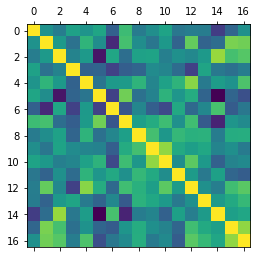

In [65]:
AA=df2.corr()
display(abs(AA.iloc[: , -1])>0.2)

plt.matshow(df2.corr())
plt.show()

In [1]:
#all data, average of counties, without using irrigation type as input variable


reg1 = linear_model.LinearRegression()

sub_=df2[['water', 'CnlWell','Nirrig','ETo','Elev','Clim','ECwat','GDay','Texture']] #0.933
sub_=df2[['water', 'CnlWell','Nirrig','ETo','Elev','Clim','ECwat','GDay']] #0.933
out_=df2['yield']
reg1.fit(sub_, out_)
reg1.coef_,reg1.intercept_
y_hat1=reg1.predict(sub_)
y_obs1=np.array(out_)
print(r2_score(y_obs1,y_hat1))


plt.scatter(y_obs1, y_hat1)

NameError: name 'linear_model' is not defined

In [67]:
df3=df1[df1['SurfPres']==1]
df3=df3.groupby('county').mean()

df4=df1[df1['SurfPres']==2]
df4=df4.groupby('county').mean()

0.5845645399900142


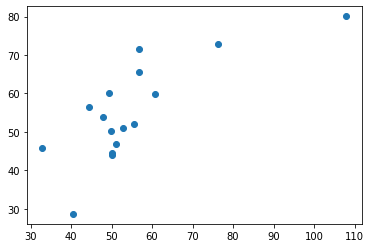

In [68]:
#surface irrigation only, average of counties

reg = linear_model.LinearRegression()

sub_=df3[['water', 'CnlWell','Nirrig','ETo','Elev','Clim','ECwat','GDay','Texture']]
out_=df3['yield']
reg.fit(sub_, out_)
reg.coef_,reg.intercept_
y_hat=reg.predict(sub_)
y_obs=np.array(out_)
print(r2_score(y_obs,y_hat))


plt.scatter(y_obs, y_hat)

0.830304620311415


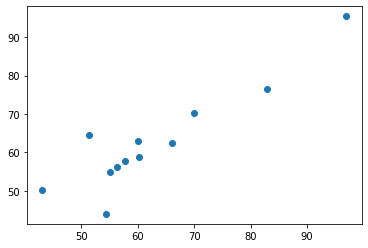

In [69]:
#pressurized irrigation only, average of counties

reg = linear_model.LinearRegression()

sub_=df4[['water', 'CnlWell','Nirrig','ETo','Elev','Clim','ECwat','GDay','Texture']]
out_=df4['yield']
reg.fit(sub_, out_)
reg.coef_,reg.intercept_
y_hat=reg.predict(sub_)
y_obs=np.array(out_)
print(r2_score(y_obs,y_hat))


plt.scatter(y_obs, y_hat)

0.443725525400515
[[1.         0.66612726]
 [0.66612726 1.        ]]


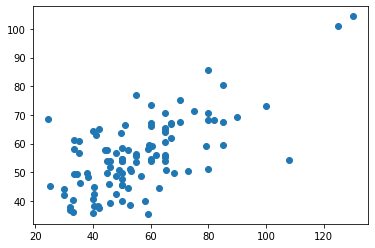

In [70]:
#all data, farm level


reg = linear_model.LinearRegression()

sub_=df1[['water', 'CnlWell','Nirrig','ETo','Elev','Clim','ECwat','GDay','Texture','SurfPres','Edu','cultvr']]
out_=df1['yield']
reg.fit(sub_, out_)
reg.coef_,reg.intercept_
y_hat=reg.predict(sub_)
y_obs=np.array(out_)
print(r2_score(y_obs,y_hat))
print(np.corrcoef(y_obs,y_hat))

plt.scatter(y_obs, y_hat)

In [71]:
y_hat1

array([50.52957105, 57.82523566, 36.39592448, 61.11708281, 65.23475326,
       64.26007751, 44.50012049, 47.9117513 , 94.83624624, 52.65680296,
       75.18782086, 56.60002424, 37.57080676, 50.71762061, 57.10003094,
       53.61898409])

,province,county_avg,countygroup,CnlWell,Texture,SurfPres,Clim,Edu,cultvr,Area,ECwat,ECsoil,GDay,Nirrig,ETo,Elev,water,yield
0,1.0,50.5,1.0,1.0,1.0,1.0,0.0,2.0,0.0,4.0,0.4,0.5,96.0,8.0,548.0,1613.0,9257.4,50.0
1,1.0,50.5,1.0,2.0,1.0,2.0,0.0,2.0,0.0,4.0,0.3,0.8,98.0,21.0,561.0,1613.0,4478.1,60.0
2,1.0,57.8,1.0,2.0,1.0,1.0,0.0,2.0,0.0,8.0,0.4,0.4,97.0,10.0,594.0,1293.0,10670.0,45.0
3,1.0,57.8,1.0,2.0,1.0,1.0,0.0,2.0,0.0,11.5,0.4,0.4,97.0,8.0,594.0,1293.0,9070.0,60.0
4,1.0,57.8,1.0,2.0,1.0,1.0,0.0,2.0,0.0,4.5,0.4,0.4,97.0,7.0,594.0,1293.0,6300.0,33.4
5,1.0,57.8,1.0,2.0,2.0,1.0,0.0,2.0,0.0,16.0,0.4,0.6,98.0,10.0,537.0,1613.0,8978.1,59.4
6,2.0,36.4,1.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,1.1,1.7,80.0,4.0,461.0,99.0,5080.0,40.0
7,2.0,36.4,1.0,1.0,2.0,1.0,0.0,0.0,0.0,13.0,1.1,1.7,87.0,6.0,444.0,121.0,7470.0,30.0
8,2.0,36.4,1.0,1.0,2.0,1.0,0.0,0.0,0.0,17.5,1.1,1.7,92.0,4.0,398.0,127.0,5490.0,32.0
9,2.0,36.4,1.0,1.0,2.0,1.0,0.0,2.0,0.0,4.0,1.1,1.7,77.0,4.0,407.0,75.0,5100.0,32.0


0.5584068320326083
[[1.         0.74726624]
 [0.74726624 1.        ]]


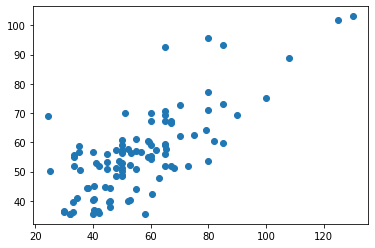

In [73]:
data2=np.copy(data1)
for j in range(N):
    data2[j,1]=y_hat1[int(data1[j,1])-1]
    
df6=pd.DataFrame(data2,columns=['province','county_avg','countygroup','CnlWell','Texture','SurfPres',
                                'Clim','Edu', 'cultvr','Area', 'ECwat', 'ECsoil',
                                'GDay','Nirrig','ETo','Elev','water','yield'])

display(HTML("<div style='height: 400px; overflow: auto; width: fit-content'>"+df6.to_html()+"</div>"))


reg = linear_model.LinearRegression()

sub_=df6[['water', 'county_avg']]
sub_=df6[['water', 'CnlWell','Nirrig','ETo','Elev','Clim','ECwat','GDay','Texture','SurfPres','Edu','cultvr','county_avg']]
sub_=df6[['water', 'CnlWell','Nirrig','Elev','ECwat','Texture','county_avg']]
sub_=df6[[ 'Nirrig','ECwat','Texture','county_avg']]
out_=df6['yield']
reg.fit(sub_, out_)
reg.coef_,reg.intercept_
y_hat=reg.predict(sub_)
y_obs=np.array(out_)
print(r2_score(y_obs,y_hat))
print(np.corrcoef(y_obs,y_hat))

plt.scatter(y_obs, y_hat)

In [75]:
df6_1=df6.loc[df6['countygroup'] == 1]
df6_2=df6.loc[df6['countygroup'] == 2]
df6_3=df6.loc[df6['countygroup'] == 3]

0.5725633763319469


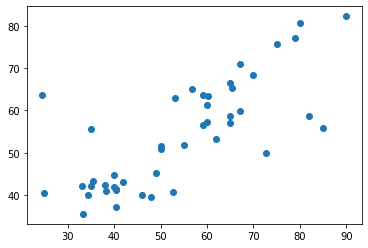

In [104]:
reg1 = linear_model.LinearRegression()

sub_=df6_2[[    'water',  'ECwat' , 'SurfPres',  'county_avg']]
out_=df6_2['yield']
reg1.fit(sub_, out_)
reg1.coef_,reg1.intercept_
y_hat1=reg1.predict(sub_)
y_obs1=np.array(out_)
print(r2_score(y_obs1,y_hat1))
plt.scatter(y_obs1, y_hat1)

,province,county_avg,CnlWell,Texture,SurfPres,Clim,Edu,cultvr,Area,ECwat,ECsoil,GDay,Nirrig,ETo,Elev,water,yield
province,1.0,-0.0,-0.1,0.1,0.1,0.4,0.0,0.3,-0.0,-0.0,0.1,0.1,0.1,-0.0,-0.4,-0.1,0.1
county_avg,-0.0,1.0,0.5,-0.0,0.3,-0.3,0.1,0.0,0.2,0.1,0.1,-0.1,0.4,0.4,0.4,0.5,0.7
CnlWell,-0.1,0.5,1.0,-0.1,0.3,-0.5,0.2,-0.1,0.2,0.3,0.1,0.1,0.1,0.2,0.7,0.3,0.3
Texture,0.1,-0.0,-0.1,1.0,-0.2,-0.2,-0.1,-0.2,-0.1,-0.1,-0.2,-0.0,-0.3,0.2,0.1,-0.0,0.1
SurfPres,0.1,0.3,0.3,-0.2,1.0,-0.0,0.3,0.2,0.3,0.1,0.2,0.2,0.6,0.0,0.1,-0.3,0.3
Clim,0.4,-0.3,-0.5,-0.2,-0.0,1.0,-0.2,0.6,-0.0,0.1,0.3,0.1,0.4,-0.2,-0.7,-0.1,-0.2
Edu,0.0,0.1,0.2,-0.1,0.3,-0.2,1.0,-0.1,0.0,-0.0,-0.0,0.2,0.1,0.1,0.3,-0.1,0.1
cultvr,0.3,0.0,-0.1,-0.2,0.2,0.6,-0.1,1.0,0.0,0.1,0.3,-0.0,0.4,-0.2,-0.4,-0.0,0.0
Area,-0.0,0.2,0.2,-0.1,0.3,-0.0,0.0,0.0,1.0,0.4,0.2,0.1,0.4,0.2,0.1,-0.0,0.1
ECwat,-0.0,0.1,0.3,-0.1,0.1,0.1,-0.0,0.1,0.4,1.0,0.7,0.1,0.4,0.2,0.1,0.0,-0.1


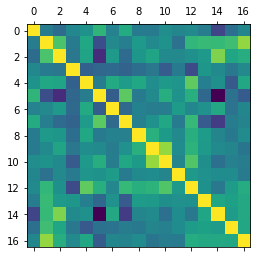

In [18]:
AA=df6.corr()
display(AA)

plt.matshow(df6.corr())
plt.show()

In [19]:
1+1

2

0.5584068320326083
[[1.         0.74726624]
 [0.74726624 1.        ]]
12.697186750592065


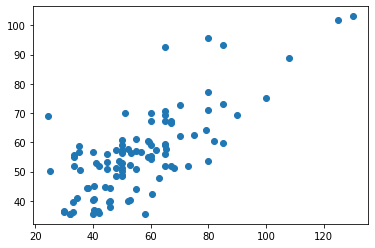

In [20]:

sub_=df6[['water', 'county_avg']]
sub_=df6[['water', 'CnlWell','Nirrig','ETo','Elev','Clim','ECwat','GDay','Texture','SurfPres','Edu','cultvr','county_avg']]
sub_=df6[['water', 'CnlWell','Nirrig','Elev','ECwat','Texture','county_avg']]
sub_=df6[[ 'Nirrig','ECwat','Texture','county_avg']]
out_=df6['yield']

reg_lin = linear_model.LinearRegression()





reg_lin.fit(sub_, out_)
reg_lin.coef_,reg.intercept_
y_hat_lin=reg_lin.predict(sub_)
y_obs=np.array(out_)
print(r2_score(y_obs,y_hat_lin))
print(np.corrcoef(y_obs,y_hat_lin))

plt.scatter(y_obs, y_hat_lin)

print(np.sqrt(mse(y_obs, y_hat_lin)))

0 20.58 20.56
1 14.14 17.2
7 13.54 14.39
42 12.96 14.74

99 12.96 14.74


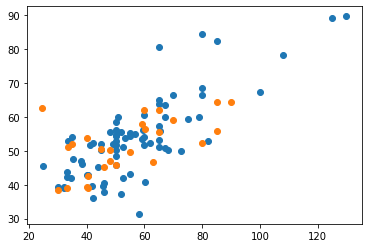

In [21]:

sub_=df6[['water', 'county_avg']]
#sub_=df6[['water', 'CnlWell','Nirrig','ETo','Elev','Clim','ECwat','GDay','Texture','SurfPres','Edu','cultvr','county_avg']]
#sub_=df6[['water', 'CnlWell','Nirrig','Elev','ECwat','Texture','county_avg']]
#sub_=df6[[ 'Nirrig','ECwat','Texture','county_avg','water']]
#sub_=df6[[ 'Nirrig','ECwat','Texture','water']]
out_=df6['yield']


sub_np=sub_.to_numpy()
out_np=out_.to_numpy()


sub_np=np.c_[sub_np,y_hat_lin]

sub_min=np.min(sub_np,axis=0)
sub_max=np.max(sub_np,axis=0)
out_min=np.min(out_np,axis=0)
out_max=np.max(out_np,axis=0)

sub_normal=(sub_np-sub_min)/(sub_max-sub_min)
out_normal=(out_np-out_min)/(out_max-out_min)

fun = lambda x: x * (out_max-out_min) + out_min


xtrain, xtest, ytrain, ytest = train_test_split(sub_normal, out_normal)

perf_=10000000

for i in range(100):
    regr1 = MLPRegressor(max_iter=10000,activation='tanh',hidden_layer_sizes=(5,)).fit(xtrain, ytrain)
    ytrainhat=regr1.predict(xtrain)
    ytesthat=regr1.predict(xtest)
    
    a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
    a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
    
    perf=a1
    if perf<perf_:
        print(i,round(a1,2),round(a2,2))
        regr=regr1
        perf_=perf

ytrainhat=regr.predict(xtrain)
ytesthat=regr.predict(xtest)
#a1=np.corrcoef(fun(ytrain),fun(ytrainhat))
#a2=np.corrcoef(fun(ytest),fun(ytesthat))
#a1=a1[1,0]
#a2=a2[1,0]
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
perf=a2
print()
print(i,round(a1,2),round(a2,2))


yhat=regr.predict(sub_normal)*(out_max-out_min)+out_min

plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))



## 

0 7.22 11.64
10 6.72 11.38

99 6.72 11.38


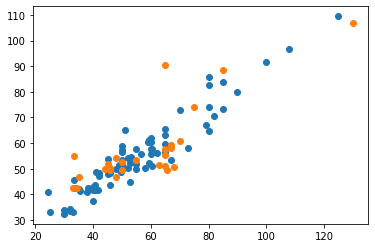

In [163]:

sub_=df6[['water', 'county_avg']]
#sub_=df6[['county_avg']]
sub_=df6[['water', 'CnlWell','Nirrig','ETo','Elev','Clim','ECwat','GDay','Texture','SurfPres','Edu','cultvr','county_avg']]
#sub_=df6[['water', 'CnlWell','Nirrig','Elev','ECwat','Texture','county_avg']]
#sub_=df6[[ 'Nirrig','ECwat','Texture','county_avg','water']]
#sub_=df6[[ 'Nirrig','ECwat','Texture','water']]
out_=df6['yield']


sub_np=sub_.to_numpy()
out_np=out_.to_numpy()


sub_np=np.c_[sub_np,y_hat_lin]

sub_min=np.min(sub_np,axis=0)
sub_max=np.max(sub_np,axis=0)
out_min=np.min(out_np,axis=0)
out_max=np.max(out_np,axis=0)

sub_normal=(sub_np-sub_min)/(sub_max-sub_min)
out_normal=(out_np-out_min)/(out_max-out_min)

fun = lambda x: x * (out_max-out_min) + out_min


xtrain, xtest, ytrain, ytest = train_test_split(sub_normal, out_normal)

perf_=10000000

for i in range(100):
    regr1 = RandomForestRegressor(max_depth=5).fit(xtrain, ytrain)
    ytrainhat=regr1.predict(xtrain)
    ytesthat=regr1.predict(xtest)
    
    a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
    a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
    
    perf=a2
    if perf<perf_:
        print(i,round(a1,2),round(a2,2))
        regr=regr1
        perf_=perf

ytrainhat=regr.predict(xtrain)
ytesthat=regr.predict(xtest)
#a1=np.corrcoef(fun(ytrain),fun(ytrainhat))
#a2=np.corrcoef(fun(ytest),fun(ytesthat))
#a1=a1[1,0]
#a2=a2[1,0]
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
perf=a2
print()
print(i,round(a1,2),round(a2,2))


yhat=regr.predict(sub_normal)*(out_max-out_min)+out_min

plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))



99 12.29 15.45


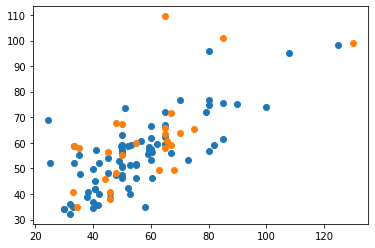

In [165]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xtrain, ytrain)
ytrainhat=reg.predict(xtrain)
ytesthat=reg.predict(xtest)
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
print(i,round(a1,2),round(a2,2))
yhat=reg.predict(sub_normal)*(out_max-out_min)+out_min
plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))

99 12.76 12.53


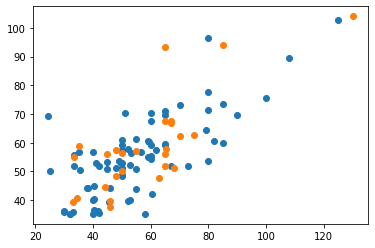

In [166]:
from sklearn.linear_model import OrthogonalMatchingPursuit
reg = OrthogonalMatchingPursuit().fit(xtrain, ytrain)
ytrainhat=reg.predict(xtrain)
ytesthat=reg.predict(xtest)
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
print(i,round(a1,2),round(a2,2))
yhat=reg.predict(sub_normal)*(out_max-out_min)+out_min
plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))

In [121]:
from sklearn.neighbors import KNeighborsRegressor

99 11.76 15.44


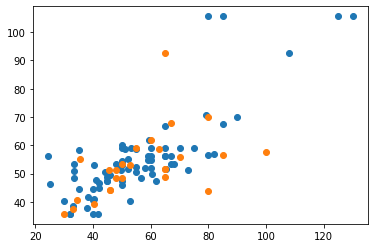

In [153]:
neigh = KNeighborsRegressor(n_neighbors=5,weights='uniform',p=2,leaf_size=30).fit(xtrain, ytrain)
ytrainhat=neigh.predict(xtrain)
ytesthat=neigh.predict(xtest)
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
print(i,round(a1,2),round(a2,2))
yhat=regr.predict(sub_normal)*(out_max-out_min)+out_min
plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))

99 13.01 15.05


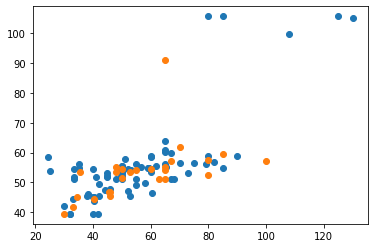

In [152]:
from sklearn.neighbors import RadiusNeighborsRegressor
neigh = RadiusNeighborsRegressor(radius=0.5,weights='uniform',p=1).fit(xtrain, ytrain)
ytrainhat=neigh.predict(xtrain)
ytesthat=neigh.predict(xtest)
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
print(i,round(a1,2),round(a2,2))
yhat=neigh.predict(sub_normal)*(out_max-out_min)+out_min
plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))

99 11.29 12.28


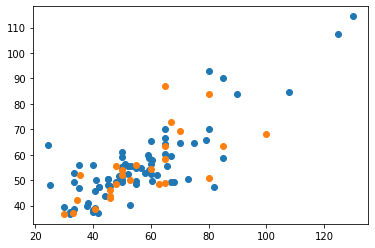

In [143]:
from sklearn.svm import SVR
svr_ = SVR(C=2, epsilon=0.1,degree=2,kernel='poly').fit(xtrain, ytrain)
svr_ = SVR(C=0.5, epsilon=.05,degree=2,kernel='rbf').fit(xtrain, ytrain)
ytrainhat=svr_.predict(xtrain)
ytesthat=svr_.predict(xtest)
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
print(i,round(a1,2),round(a2,2))
yhat=svr_.predict(sub_normal)*(out_max-out_min)+out_min
plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))

99 7.28 15.18


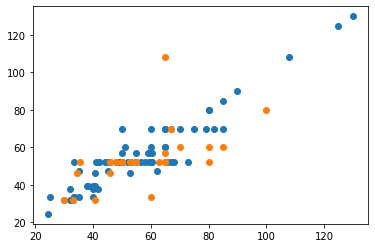

In [128]:
from sklearn.tree import DecisionTreeRegressor
dectree_ = DecisionTreeRegressor(max_depth=5,min_samples_leaf=10).fit(xtrain, ytrain)
dectree_ = DecisionTreeRegressor(max_depth=5).fit(xtrain, ytrain)
ytrainhat=dectree_.predict(xtrain)
ytesthat=dectree_.predict(xtest)
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
print(i,round(a1,2),round(a2,2))
yhat=dectree_.predict(sub_normal)*(out_max-out_min)+out_min
plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))

99 7.28 15.18


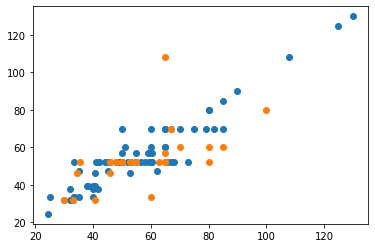

In [158]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(xtrain, ytrain)
gpr = DecisionTreeRegressor(max_depth=5).fit(xtrain, ytrain)
ytrainhat=gpr.predict(xtrain)
ytesthat=gpr.predict(xtest)
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
print(i,round(a1,2),round(a2,2))
yhat=gpr.predict(sub_normal)*(out_max-out_min)+out_min
plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))

99 7.28 15.18


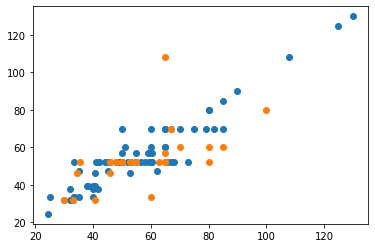

In [159]:
from sklearn import linear_model
clf = linear_model.ARDRegression().fit(xtrain, ytrain)
clf = DecisionTreeRegressor(max_depth=5).fit(xtrain, ytrain)
ytrainhat=clf.predict(xtrain)
ytesthat=clf.predict(xtest)
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
print(i,round(a1,2),round(a2,2))
yhat=clf.predict(sub_normal)*(out_max-out_min)+out_min
plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))

99 7.28 15.18


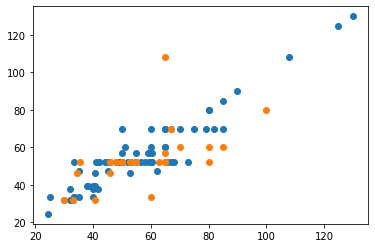

In [160]:
from sklearn import linear_model
clf = linear_model.BayesianRidge().fit(xtrain, ytrain)
clf = DecisionTreeRegressor(max_depth=5).fit(xtrain, ytrain)
ytrainhat=clf.predict(xtrain)
ytesthat=clf.predict(xtest)
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
print(i,round(a1,2),round(a2,2))
yhat=clf.predict(sub_normal)*(out_max-out_min)+out_min
plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))

99 7.28 15.18


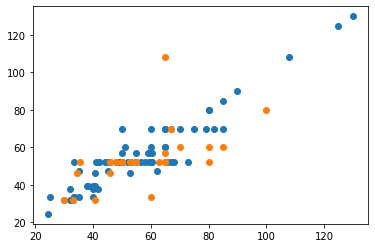

In [161]:
from sklearn.linear_model import HuberRegressor, LinearRegression
huber = HuberRegressor().fit(xtrain, ytrain)
huber = DecisionTreeRegressor(max_depth=5).fit(xtrain, ytrain)
ytrainhat=huber.predict(xtrain)
ytesthat=huber.predict(xtest)
a1=np.sqrt(mse(fun(ytrain),fun(ytrainhat)))
a2=np.sqrt(mse(fun(ytest),fun(ytesthat)))
print(i,round(a1,2),round(a2,2))
yhat=huber.predict(sub_normal)*(out_max-out_min)+out_min
plt.scatter(fun(ytrain),fun(ytrainhat))
plt.scatter(fun(ytest),fun(ytesthat))

99 7.28 15.18


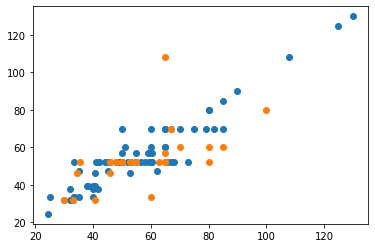